# **prepare the data**

In [ ]:
import pandas as pd
df = pd.read_csv('/content/KaggleV2-May-2016.csv')
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [ ]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [ ]:
df.shape

(110527, 14)

In [ ]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [ ]:
df.duplicated().any()

False

In [ ]:
df=df.rename(columns={'No-show': 'No_Show'}) 

# Task **1**

In [ ]:
df['No_Show'].value_counts()

No     88208
Yes    22319
Name: No_Show, dtype: int64

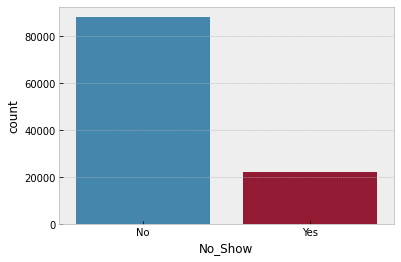

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('bmh')
ax=sns.countplot(x=df.No_Show , data=df)
plt.show()

In [ ]:
df['Gender'].value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

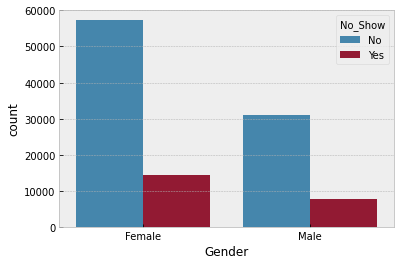

In [ ]:
ax=sns.countplot(x=df.Gender,hue=df.No_Show,data=df)
ax.set_xticklabels(['Female', 'Male'])
plt.show()

* change the data type of 'ScheduledDay' and 'AppointmentDay' to a datetime so we can handle it

In [ ]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'], 
 format = '%Y-%m-%dT%H:%M:%SZ', 
 errors = 'coerce')
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'], 
 format = '%Y-%m-%dT%H:%M:%SZ', 
 errors = 'coerce')

because all appointmentday had 00:00:00 of it clock some of scheduleday have date greater than the appointmentday so we will make the time of all appointmentday clock to 23:59:59 to be in the end of the day

In [ ]:
df['AppointmentDay'] = df['AppointmentDay'] +pd.Timedelta('1d') - pd.Timedelta('1s')

In [ ]:
df['AppointmentDay'].head()

0   2016-04-29 23:59:59
1   2016-04-29 23:59:59
2   2016-04-29 23:59:59
3   2016-04-29 23:59:59
4   2016-04-29 23:59:59
Name: AppointmentDay, dtype: datetime64[ns]

* dropping all unreal date 

In [ ]:
df = df.loc[(df['ScheduledDay']<=df['AppointmentDay'])].copy()

* get the number of days between Appointmentday and scheduledday




In [ ]:
df['delta_days'] = (df['AppointmentDay']-df['ScheduledDay']).dt.total_seconds()/(60*60*24)

In [ ]:
df['delta_days'] = df['delta_days'].astype(int)
df['delta_days'].value_counts()

0      38563
2       6725
4       5290
1       5213
7       4906
       ...  
132        1
125        1
117        1
146        1
123        1
Name: delta_days, Length: 129, dtype: int64

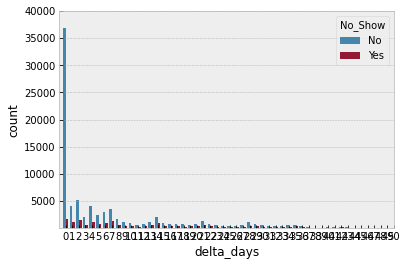

In [ ]:
ax=sns.countplot(x=df.delta_days,hue=df.No_Show,data=df)
sns.set(rc={'figure.figsize':(17,8)})
# ax.set_xticklabels(['Female', 'Male'])
# ax.figure(figsize=(15, 8))
ax.set_ylim(1, 40000)
ax.set_xlim(-1, 50)
plt.show()

get the days of appointmmentday 

In [ ]:
df['AppointmentDay_dayofweek'] = df['AppointmentDay'].dt.dayofweek
df['AppointmentDay_dayofweek'] = df['AppointmentDay_dayofweek'].map({0:"Monday", 1 : 'Tuesday',2:'wednesday',3:'thursday',4:'Friday',5:'Saturday'})
df['AppointmentDay_dayofweek'].value_counts()

wednesday    25866
Tuesday      25638
Monday       22714
Friday       19019
thursday     17246
Saturday        39
Name: AppointmentDay_dayofweek, dtype: int64

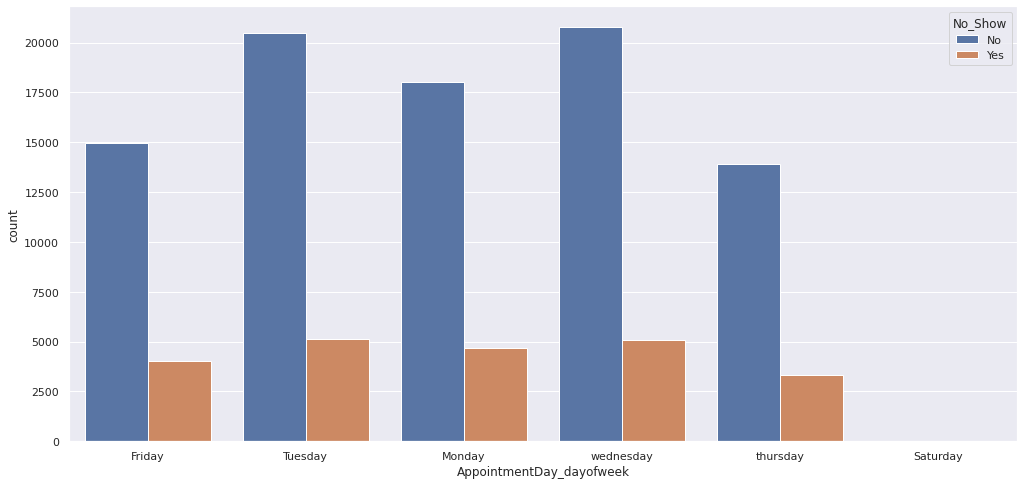

In [ ]:
ax=sns.countplot(x=df.AppointmentDay_dayofweek,hue=df.No_Show,data=df)
# ax.set_xticklabels(['monday', 'sunday','tuesday','wednesday','thrasday','friday'])
plt.show()

get the days of ScheduledDay

In [ ]:
df['ScheduledDay_dayofweek'] = df['ScheduledDay'].dt.dayofweek
df['ScheduledDay_dayofweek'] = df['ScheduledDay_dayofweek'].map({0:"Monday", 1 : 'Tuesday',2:'wednesday',3:'thersday',4:'Friday',5:'Saturday'})
df['ScheduledDay_dayofweek'].value_counts()

Tuesday      26167
wednesday    24259
Monday       23085
Friday       18915
thersday     18072
Saturday        24
Name: ScheduledDay_dayofweek, dtype: int64

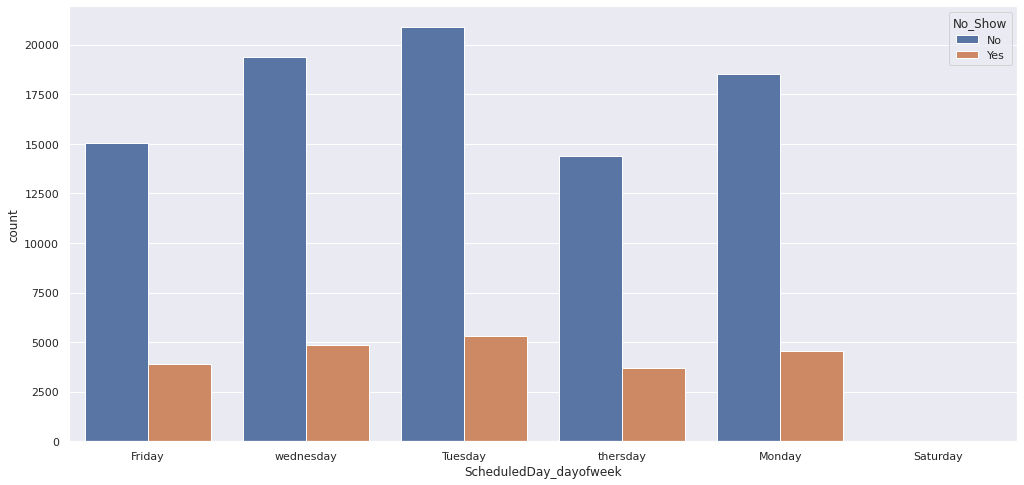

In [ ]:
ax=sns.countplot(x=df.ScheduledDay_dayofweek,hue=df.No_Show,data=df)
# ax.set_xticklabels(['monday', 'sunday','tuesday','wednesday','thrasday','friday'])
plt.show()

Q1: Who are the patients with the highest number of no-show-ups?

In [ ]:
df["PatientId"][df["No_Show"]=='Yes'].value_counts().head(1)

1.421987e+12    18
Name: PatientId, dtype: int64

In [ ]:
df_patient = pd.DataFrame(df["PatientId"][df["No_Show"]=='Yes'].value_counts())
df_patient.columns = ['NumberofNoShow']
df_patient["PatientId"]=df_patient.index
df_patient.columns = ['NumberofNoShow','Patient']
df_patient

,NumberofNoShow,Patient
1.421987e+12,18,1.421987e+12
5.635135e+14,16,5.635135e+14
5.587790e+12,15,5.587790e+12
5.811973e+14,14,5.811973e+14
6.575144e+13,13,6.575144e+13
...,...,...
3.839335e+14,1,3.839335e+14
2.772585e+14,1,2.772585e+14
5.795568e+13,1,5.795568e+13
2.493497e+13,1,2.493497e+13


Q2: What are the health conditions of patients with the highest number of no-show-ups?

In [ ]:
df['Diabetes'][df_patient['NumberofNoShow']].head(15)

18    0
16    0
15    0
14    0
13    0
12    0
11    0
11    0
11    0
11    0
10    0
10    0
10    0
10    0
9     0
Name: Diabetes, dtype: int64

In [ ]:
df['Handcap'][df_patient['NumberofNoShow']].head(15)

18    0
16    0
15    0
14    0
13    0
12    0
11    0
11    0
11    0
11    0
10    0
10    0
10    0
10    0
9     0
Name: Handcap, dtype: int64

In [ ]:
df['Hipertension'][df_patient['NumberofNoShow']].head(15)

18    0
16    0
15    0
14    0
13    0
12    0
11    0
11    0
11    0
11    0
10    0
10    0
10    0
10    0
9     0
Name: Hipertension, dtype: int64

Q3: Who are the patients with the least number of no-show-ups?

In [ ]:
df_patient.sort_values("NumberofNoShow", ascending=True,inplace=True)
df_patient.head(1)

,NumberofNoShow,Patient
9.257314e+12,1,9.257314e+12


Q4: What are the health conditions of patients with the least number of no-show-ups?

In [ ]:
df['Diabetes'][df_patient['NumberofNoShow']].head(15)

1    0
1    0
1    0
1    0
1    0
1    0
1    0
1    0
1    0
1    0
1    0
1    0
1    0
1    0
1    0
Name: Diabetes, dtype: int64

In [ ]:
df['Handcap'][df_patient['NumberofNoShow']].head(15)

1    0
1    0
1    0
1    0
1    0
1    0
1    0
1    0
1    0
1    0
1    0
1    0
1    0
1    0
1    0
Name: Handcap, dtype: int64

In [ ]:
df['Hipertension'][df_patient['NumberofNoShow']].head(15)

1    0
1    0
1    0
1    0
1    0
1    0
1    0
1    0
1    0
1    0
1    0
1    0
1    0
1    0
1    0
Name: Hipertension, dtype: int64

Q5: What are the neighborhoods with the highest no-show-ups?

In [ ]:
df['Neighbourhood'][df["No_Show"]=='Yes'].value_counts().head(1)

JARDIM CAMBURI    1465
Name: Neighbourhood, dtype: int64

# **Task 2**

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

change the string values to int to fit in the model

In [ ]:
df['No_Show'] = df['No_Show'].map({'Yes':1, 'No':0})

In [ ]:
df['Gender'] = df['Gender'].map({'F':1, 'M':0})

drop unwanted columns

In [ ]:
df.drop(['PatientId','AppointmentID','ScheduledDay','AppointmentDay','AppointmentDay_dayofweek','ScheduledDay_dayofweek'],axis=1,inplace=True)


In [ ]:
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_Show,delta_days
0,1,62,JARDIM DA PENHA,0,1,0,0,0,0,0,0
1,0,56,JARDIM DA PENHA,0,0,0,0,0,0,0,0
2,1,62,MATA DA PRAIA,0,0,0,0,0,0,0,0
3,1,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,0
4,1,56,JARDIM DA PENHA,0,1,1,0,0,0,0,0


drop fake age

In [ ]:
df = df [(df.Age >=0)]

In [ ]:
feature_cols = [ 'Age', 'Scholarship', 'Hipertension','Diabetes','Alcoholism','Handcap','SMS_received','delta_days','Gender']
X = df[feature_cols] 
y = df.No_Show 



```
# This is formatted as code
```

Split dataset into training set and test set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) 

In [ ]:
# df.drop(['Neighbourhood'],axis=1,inplace=True)

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7668400814295409


In [ ]:
print("Accuracy on training set: {:.3f}".format(clf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(clf.score(X_test, y_test)))

Accuracy on training set: 0.869
Accuracy on test set: 0.767


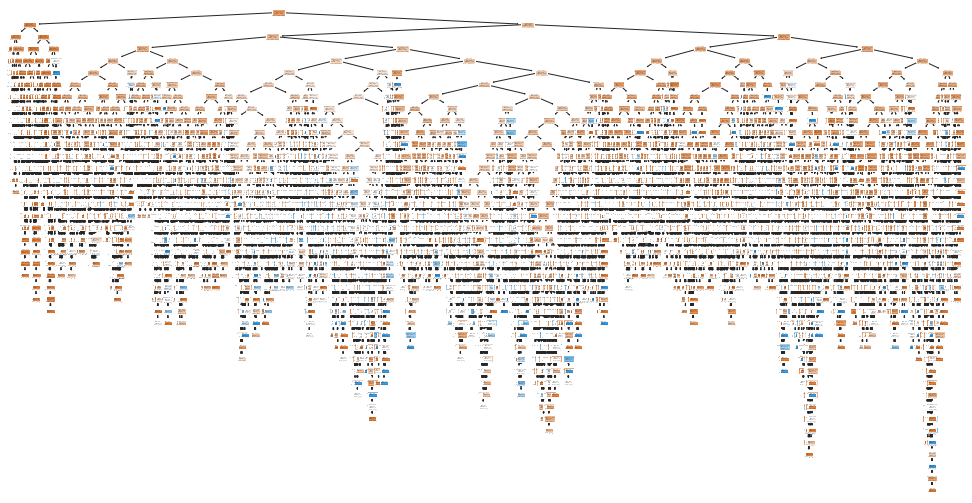

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(17,9))
tree.plot_tree(clf,feature_names=feature_cols,filled=True)
plt.show()